In [12]:
import pandas as pd
import pandas_datareader as pdr
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## World Bank Data - GDP Per Capita (Current US$)

GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.

In [13]:
wbi = pd.read_csv("datasets/GDP_per_capita_world_bank.csv")

### Histogram comparison between 1960, 1990, 2020

In [14]:
def get_log_hist(data, years):
    filtered_data = data.filter(items=['Country Code', years[0], years[1], years[2]])
    log_gdp = filtered_data.iloc[:,1:].transform(lambda x: np.log(x))
    max_log_gdp = log_gdp.max(numeric_only=True).max()
    min_log_gdp = log_gdp.min(numeric_only=True).min()
    log_gdp.hist(bins=16, range=[min_log_gdp, max_log_gdp], log=True)

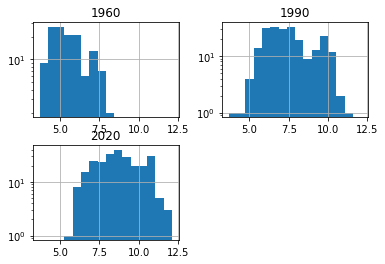

In [15]:
## All countries
wbiall = wbi.drop(['Country Name' , 'Indicator Name', 'Indicator Code'], axis=1)
get_log_hist(wbiall, ['1960', '1990', '2020'])

### Comparison of GDP between different Income Groups

Countries taken into account

#### High income
- USA
- Canada
- Australia
- Japan
#### Upper middle income
- China
- Brazil
- Fiji
- Jamaica
#### Lower middle income
- India
- Pakistan
- Bangladesh
- Vietnam
#### Low income
- Congo
- Uganda
- Yemen
- Afghanistan

#### Plot for all countries

In [5]:
# USA, Canada, Australia, Japan, China, Brazil, Fiji, Jamaica, India, Pakistan, Bangladesh, Vietnam, Congo, Uganda, Yemen, Afghanistan
country_list = ['USA', 'CAN', 'AUS', 'JPN', 'CHN', 'BRA', 'FJI', 'JAM', 'IND', 'PAK', 'BGD', 'VNM', 'COD', 'UGA', 'YEM', 'AFG']

In [6]:
def filter_country_list_data(dataframe, country_list):
    wbi_cl = dataframe.loc[dataframe['Country Code'].isin(country_list)]
    wbi_cl = wbi_cl.drop(['Country Name' , 'Indicator Name', 'Indicator Code'], axis=1)
    wbi_cl = wbi_cl.transpose()
    wbi_cl = wbi_cl.rename(columns=wbi_cl.iloc[0])
    wbi_cl = wbi_cl.drop(wbi_cl.index[0])
    return wbi_cl

<AxesSubplot:>

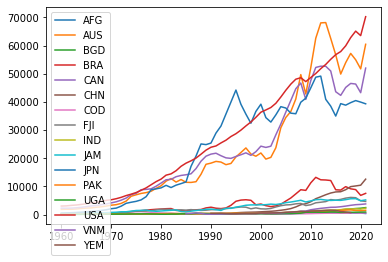

In [7]:
wbi_country_filtered = filter_country_list_data(wbi, country_list)
wbi_country_filtered.plot()

#### Plot for Upper middle and lower middle income groups

<AxesSubplot:>

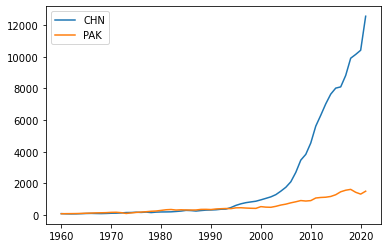

In [8]:
# China, Pakistan (Upper middle income and lower middle income)
country_list_umi_lmi = ['CHN', 'PAK']
wbi_filtered_umi_lmi = filter_country_list_data(wbi, country_list_umi_lmi)
wbi_filtered_umi_lmi.plot()

#### Plot for lower middle income

<AxesSubplot:>

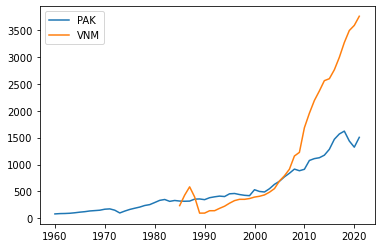

In [9]:
# Vietnam, Pakistan (Lower middle income)
country_list_lmi = ['VNM', 'PAK']
wbi_filtered_lmi = filter_country_list_data(wbi, country_list_lmi)
wbi_filtered_lmi.plot()

#### Plot for lower middle income and low income

<AxesSubplot:>

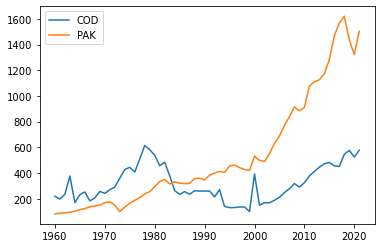

In [10]:
# Pakistan, Congo (Lower middle income, low income)
country_list_lmi_li = ['PAK', 'COD']
wbi_filtered_lmi = filter_country_list_data(wbi, country_list_lmi_li)
wbi_filtered_lmi.plot()